
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>
    Armin Ghojehzadeh

____

# 🔴 **Import Libs**

In [47]:
!pip uninstall -y torchtext torch
!pip install torch==2.1.0
!pip install torchtext==0.15.2
!pip install torchmetrics

Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Successfully uninstalled torchtext-0.15.2
Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached triton-2.1.0-0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
Using cached triton-2.1.0-0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (89.2 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.0.0
    Uninstalling triton-2.0.0:
      Successfully uninstalled triton-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.1.0 which is incompatible.


  Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl.metadata (7.4 kB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.0 kB)
Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)
Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
Using cached triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/906.4 MB 104.7 MB/s eta 0:00:06ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━

In [48]:
import numpy as np
import matplotlib.pyplot as plt

import torchtext

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from torch import optim
from torch.nn import functional as F

import tqdm
import torchmetrics as tm

In [49]:
!python --version
print(torch.__version__)
print(torchtext.__version__)

Python 3.10.12
2.0.1+cu117
0.15.2+cpu


In [50]:
for lib in [np, torch, torchtext, tqdm]:
  print(lib.__name__, '-->', lib.__version__)

numpy --> 1.26.4
torch --> 2.0.1+cu117
torchtext --> 0.15.2+cpu
tqdm --> 4.67.1


# 🔴 **Utils**

In [51]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [52]:
def num_trainable_params(model):
  nums = sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6
  return nums

# 🔴 **Dataset**

## 🟠 **Load the Dataset**

🔰 In this session you should load WikiText2 dataset.

In [53]:
# Import necessary libraries
import os
import zipfile
from google.colab import drive

# Mount Google Drive (optional if dataset is stored there)
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Define paths
zip_path = "wikitext2v1.zip"  # Update this path if your file is in Google Drive
extract_path = "wikitext2v1"

# Check if dataset is already uploaded
if not os.path.exists(zip_path):
    print("\nPlease upload 'wikitext2v1.zip' to your Colab environment or Google Drive.")
else:
    # Extract the dataset
    print("\nExtracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Dataset extracted to: {os.path.abspath(extract_path)}")

    # Define file paths for train, validation, and test sets
    train_file = os.path.join(extract_path, "wikitext-2/wiki.train.tokens")
    valid_file = os.path.join(extract_path, "wikitext-2/wiki.valid.tokens")
    test_file = os.path.join(extract_path, "wikitext-2/wiki.test.tokens")

    # Verify dataset files
    print("\nVerifying dataset files...")
    if os.path.exists(train_file) and os.path.exists(valid_file) and os.path.exists(test_file):
        print(f"Train file: {train_file}")
        print(f"Validation file: {valid_file}")
        print(f"Test file: {test_file}")
        print("\nAll files are successfully located!")
    else:
        print("\nError: One or more files are missing. Please check your dataset structure.")


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Extracting dataset...
Dataset extracted to: /content/wikitext2v1

Verifying dataset files...
Train file: wikitext2v1/wikitext-2/wiki.train.tokens
Validation file: wikitext2v1/wikitext-2/wiki.valid.tokens
Test file: wikitext2v1/wikitext-2/wiki.test.tokens

All files are successfully located!


## 🟠 **Build vocabulary and save it**

🔰 In this section we need to:

*   Define a tokenizer using `basic_english`
*   Tokenize the dataset and collect tokens
*   Build the vocabulary using `build_vocab_from_iterator`
*   Manually insert special tokens and set the default index


In [54]:

# Define tokenizer and process the dataset
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Initialize tokenizer
print("\nDefining tokenizer...")
tokenizer = get_tokenizer('basic_english')

# Function to tokenize lines and yield tokens
def yield_tokens(file_path):
    print(f"\nTokenizing dataset: {file_path}...")
    with open(file_path, 'r') as f:
        for line in f:
            yield tokenizer(line.strip())

# Build vocabulary from tokens
print("\nBuilding vocabulary...")
vocab = build_vocab_from_iterator(yield_tokens(train_file), specials=["<unk>", "<pad>", "<bos>", "<eos>"])
vocab.set_default_index(vocab["<unk>"])

# Manually insert special tokens
print("\nManually adding special tokens...")
print(f"Vocabulary size: {len(vocab)}")
print("Special tokens added: <unk>, <pad>, <bos>, <eos>")

# Verify vocabulary
print(f"Sample tokens: {list(vocab.get_itos()[:10])}")



Defining tokenizer...

Building vocabulary...

Tokenizing dataset: wikitext2v1/wikitext-2/wiki.train.tokens...

Manually adding special tokens...
Vocabulary size: 28785
Special tokens added: <unk>, <pad>, <bos>, <eos>
Sample tokens: ['<unk>', '<pad>', '<bos>', '<eos>', 'the', ',', '.', 'of', 'and', 'in']


## 🟠 EDA

### 🟡 Let's explore the WikiText2 dataset!

### 🟡 Calculate basic statistics such as the number of documents, total words, average document length, etc.

In [55]:
from collections import Counter

def basic_stats(file_path):
    stats = {
        "num_lines": 0,
        "total_words": 0,
        "word_counter": Counter()
    }

    with open(file_path, encoding="utf-8") as f:
        for line in f:
            if line.strip():
                tokens = tokenizer(line)
                stats["total_words"] += len(tokens)
                stats["word_counter"].update(tokens)
                stats["num_lines"] += 1

    stats["avg_doc_length"] = stats["total_words"] / stats["num_lines"] if stats["num_lines"] > 0 else 0
    return stats

# Calculate statistics for each dataset
def print_stats(name, file_path):
    stats = basic_stats(file_path)
    print(f"\n{name} Set Statistics:")
    print(f"  Number of Lines: {stats['num_lines']}")
    print(f"  Total Words: {stats['total_words']}")
    print(f"  Average Document Length: {stats['avg_doc_length']:.2f}")

print_stats("Training", train_file)
print_stats("Validation", valid_file)
print_stats("Test", test_file)



Training Set Statistics:
  Number of Lines: 23767
  Total Words: 2049990
  Average Document Length: 86.25

Validation Set Statistics:
  Number of Lines: 2461
  Total Words: 214417
  Average Document Length: 87.13

Test Set Statistics:
  Number of Lines: 2891
  Total Words: 241859
  Average Document Length: 83.66


### 🟡 Analyze the most common and least common words in the dataset.

In [56]:
def analyze_common_words(file_path, n=10):
    stats = basic_stats(file_path)
    most_common = stats["word_counter"].most_common(n)
    least_common = stats["word_counter"].most_common()[-n:]
    return {
        "most_common": most_common,
        "least_common": least_common
    }

# Display most and least common words for each dataset
for name, file in zip(["Training", "Validation", "Test"], [train_file, valid_file, test_file]):
    print(f"\nAnalyzing common words in the {name} set:")
    common_words = analyze_common_words(file)
    print(f"  Most Common Words: {common_words['most_common']}")
    print(f"  Least Common Words: {common_words['least_common']}")



Analyzing common words in the Training set:
  Most Common Words: [('the', 130768), (',', 102615), ('.', 83397), ('of', 57030), ('<unk>', 54625), ('and', 50735), ('in', 45015), ('to', 39521), ('a', 36523), ('=', 29570)]
  Least Common Words: [('philipp', 3), ('prefaced', 3), ('kreutzer', 3), ('forrester', 3), ('zoromski', 3), ('roundabouts', 3), ('tuscola', 3), ('northeasterly', 3), ('intergrades', 3), ('gallinae', 3)]

Analyzing common words in the Validation set:
  Most Common Words: [('the', 14717), ('<unk>', 11718), (',', 10470), ('.', 8829), ('of', 5926), ('and', 5345), ('in', 4755), ('to', 4160), ('a', 3648), ('=', 2924)]
  Least Common Words: [('mummy', 1), ('cynical', 1), ('naive', 1), ('honest', 1), ('spends', 1), ('aerobics', 1), ('kenya', 1), ('pride', 1), ('upbringing', 1), ('hamlet', 1)]

Analyzing common words in the Test set:
  Most Common Words: [('the', 16080), ('<unk>', 15218), (',', 11502), ('.', 9977), ('of', 6787), ('and', 5882), ('in', 5078), ('to', 4781), ('a', 4

### 🟡  Please proceed with further exploration of the dataset. what do you suggest?

As it can be guessed, analyzing the distribution of word lengths across the dataset can be an excellent choice since we can gain a good perspective on whether the dataset includes any very short or extended sentences.

As it is appear, we can see that the distribution of the word lengths are relatively Gaussian with the mean of 7.5.

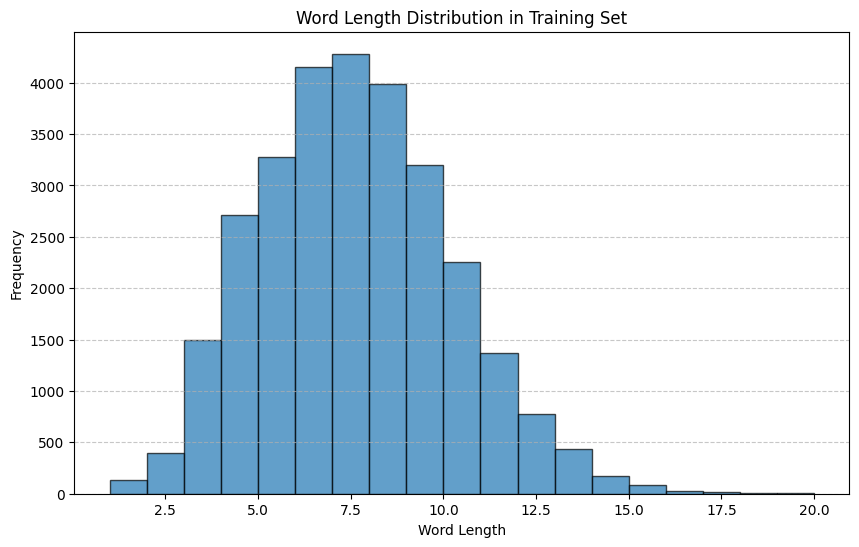

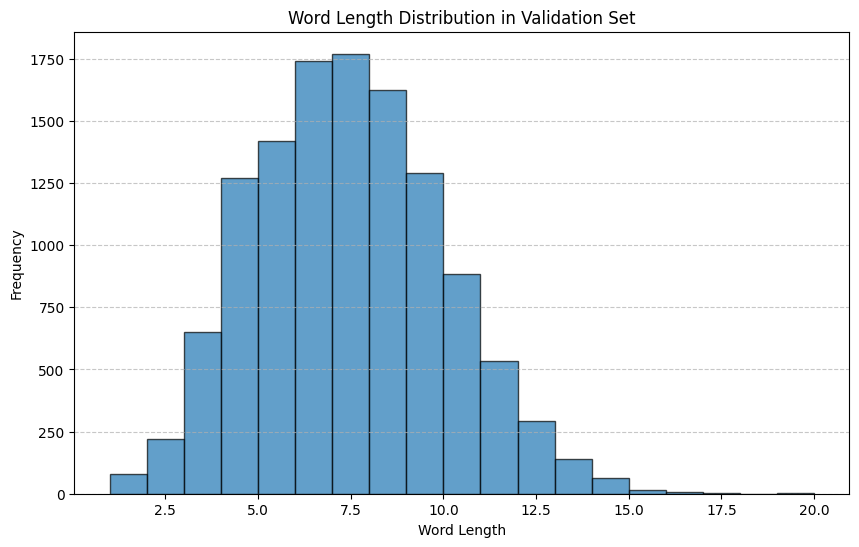

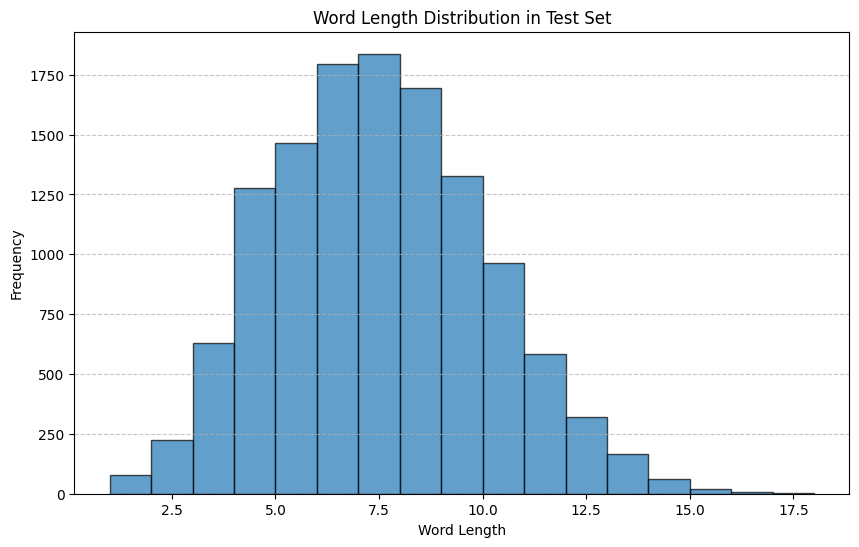

In [57]:
# Plot word length distribution
def plot_word_lengths(file_path, dataset_name):
    """
    Plot the distribution of word lengths in the dataset.
    Args:
        file_path (str): Path to the dataset file.
        dataset_name (str): Name of the dataset (e.g., "Training").
    """
    stats = basic_stats(file_path)
    word_lengths = [len(word) for word in stats["word_counter"]]
    plt.figure(figsize=(10, 6))
    plt.hist(word_lengths, bins=range(1, max(word_lengths)+1), edgecolor="black", alpha=0.7)
    plt.title(f"Word Length Distribution in {dataset_name} Set")
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plot for each dataset
plot_word_lengths(train_file, "Training")
plot_word_lengths(valid_file, "Validation")
plot_word_lengths(test_file, "Test")


## 🟠 Transform the data

🛑 Make sure to perform the transformations on train, validation and test datasets.

🔰 Reshape the dataset into an `N x B x L` or `M x L` format, where `N` represents the number of batches, `B` is the batch size, `L` is the length of a sample within each batch, and `M` is equal to `N x B`.

In [58]:
def data_process(raw_text_iter, batch_size, seq_len):
    """
    Prepare the raw text data into batches of sequences with targets.
    Args:
        raw_text_iter (iterable): Iterator over raw text lines.
        batch_size (int): Number of sequences per batch.
        seq_len (int): Length of each sequence.

    Returns:
        tuple: Tensors for inputs and targets.
    """
    token_list = []
    for text_line in raw_text_iter:
        token_list.extend([vocab["<bos>"]] + vocab(tokenizer(text_line)) + [vocab["<eos>"]])

    total_elements = len(token_list) - 1  # Exclude last token for alignment
    usable_elements = (total_elements // (batch_size * seq_len)) * (batch_size * seq_len)
    token_list = token_list[:usable_elements + 1]  # Include alignment token

    tokens_tensor = torch.tensor(token_list, dtype=torch.long)
    inputs_tensor = tokens_tensor[:-1].view(batch_size, -1)
    targets_tensor = tokens_tensor[1:].view(batch_size, -1)

    # Split into sequences
    inputs = inputs_tensor.unfold(1, seq_len, seq_len).contiguous().view(-1, seq_len)
    targets = targets_tensor.unfold(1, seq_len, seq_len).contiguous().view(-1, seq_len)

    return inputs, targets


In [59]:
# Process train, validation, and test datasets
train_iter = open(train_file, 'r')
valid_iter = open(valid_file, 'r')
test_iter = open(test_file, 'r')

batch_size = 32
seq_len = 50

print("\nProcessing datasets...")
train_inputs, train_targets = data_process(train_iter, batch_size, seq_len)
valid_inputs, valid_targets = data_process(valid_iter, batch_size, seq_len)
test_inputs, test_targets = data_process(test_iter, batch_size, seq_len)

print(f"Train Inputs Shape: {train_inputs.size()}")
print(f"Train Targets Shape: {train_targets.size()}")
print(f"Validation Inputs Shape: {valid_inputs.size()}")
print(f"Validation Targets Shape: {valid_targets.size()}")
print(f"Test Inputs Shape: {test_inputs.size()}")
print(f"Test Targets Shape: {test_targets.size()}")



Processing datasets...
Train Inputs Shape: torch.Size([42464, 50])
Train Targets Shape: torch.Size([42464, 50])
Validation Inputs Shape: torch.Size([4416, 50])
Validation Targets Shape: torch.Size([4416, 50])
Test Inputs Shape: torch.Size([4992, 50])
Test Targets Shape: torch.Size([4992, 50])


## 🟠 Custom dataset

🔰 Write a custom dataset class for LanguageModelDataset.

In [60]:
class LanguageModelDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

In [61]:
train_dataset = LanguageModelDataset(train_inputs, train_targets)
valid_dataset = LanguageModelDataset(valid_inputs, valid_targets)
test_dataset = LanguageModelDataset(test_inputs, test_targets)

## 🟠 Define a dataloader if needed

🔰 Write dataloaders for the training, validation, and test sets.

In [62]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

print("Dataloaders created.")

Dataloaders created.


# 🔴 **Model**

🔰 Use the following template to create a custom model.

Your model should consist of three parts:

*   an embedding layer
*   an LSTM layer
*   a fully connected layer

In [63]:
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate):
        super(LanguageModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=dropout_rate, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, src):
        embedded = self.embedding(src)
        lstm_out, _ = self.lstm(embedded)
        output = self.fc(lstm_out)
        return output

# 🔴 **Config**

In [64]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

🔰 Define the optimizer, loss function, metrics and other necessary parameters in this section, and ensure the model is sent to the appropriate device.

In [65]:
# Config Section
embedding_dim = 128
hidden_dim = 256
num_layers = 2
dropout_rate = 0.5
learning_rate = 0.001
num_epochs = 10

# Initialize model
model = LanguageModel(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    dropout_rate=dropout_rate
).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print configuration
def print_config():
    print("\nConfiguration:")
    print(f"  Device: {device}")
    print(f"  Embedding Dimension: {embedding_dim}")
    print(f"  Hidden Dimension: {hidden_dim}")
    print(f"  Number of Layers: {num_layers}")
    print(f"  Dropout Rate: {dropout_rate}")
    print(f"  Learning Rate: {learning_rate}")
    print(f"  Number of Epochs: {num_epochs}")
    print(f"  Loss Function: {criterion}")
    print(f"  Optimizer: {optimizer}")

print_config()

# Test model initialization
print("\nModel initialized:")
print(model)



Configuration:
  Device: cuda
  Embedding Dimension: 128
  Hidden Dimension: 256
  Number of Layers: 2
  Dropout Rate: 0.5
  Learning Rate: 0.001
  Number of Epochs: 10
  Loss Function: CrossEntropyLoss()
  Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

Model initialized:
LanguageModel(
  (embedding): Embedding(28785, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=28785, bias=True)
)


# 🔴 **Train ➰**

🔰 This is the template for train function, change it if needed.

In [66]:
def train_one_epoch(model, dataloader, loss_function, optimizer, accuracy_metric, epoch_num=None):
    model.train()
    total_loss = AverageMeter()
    accuracy_metric.reset()

    with tqdm.tqdm(dataloader, unit="batch") as progress_bar:
        for batch_inputs, batch_targets in progress_bar:
            if epoch_num:
                progress_bar.set_description(f"Training Epoch {epoch_num}")

            # Move inputs and targets to device
            inputs_on_device = batch_inputs.to(device)
            targets_on_device = batch_targets.to(device)

            # Model predictions
            predictions = model(inputs_on_device)

            # Adjust shapes for loss calculation
            predictions_reshaped = predictions.reshape(-1, len(vocab))
            targets_flattened = targets_on_device.flatten()

            # Calculate loss
            calculated_loss = loss_function(predictions_reshaped, targets_flattened)

            # Perform backpropagation and optimization
            calculated_loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Update tracking variables
            total_loss.update(calculated_loss.item(), n=targets_flattened.size(0))
            accuracy_metric.update(predictions_reshaped.softmax(dim=-1), targets_flattened)

            # Update progress bar
            progress_bar.set_postfix(avg_loss=total_loss.avg, accuracy=accuracy_metric.compute().item())

    return model, total_loss.avg, accuracy_metric.compute().item()


# 🔴 **Evaluation**

🔰 This is the template for evaluation function, change it if needed.

In [67]:
def evaluate(model, test_loader, loss_fn, metric):
    model.eval()
    loss_eval = AverageMeter()
    metric.reset()

    with torch.inference_mode():
        for inputs, targets in test_loader:
            # Move data to device
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # Reshape outputs and targets for loss calculation
            outputs = outputs.view(-1, outputs.size(-1))  # Reshape to (batch_size * seq_len, vocab_size)
            targets = targets.view(-1)  # Reshape to (batch_size * seq_len)

            # Compute loss
            loss = loss_fn(outputs, targets)

            # Update loss and metric
            loss_eval.update(loss.item(), n=len(targets))
            metric(outputs, targets)  # Assuming metric expects the reshaped outputs

    return loss_eval.avg, metric.compute().item()

# 🔴 **Training Process 〽️**

## 🟠 Finding Hyper-parameters

### 🟡 **Step 1:** Calculate the loss for an untrained model using a few batches.


In [68]:
model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)

inputs, targets = next(iter(train_loader))
inputs = inputs.to(device).view(-1, inputs.size(-1))  # Reshaping to (batch_size * seq_batches, seq_len)
targets = targets.to(device).view(-1, targets.size(-1))  # Similarly reshaping targets

with torch.no_grad():
    outputs = model(inputs)
    outputs = outputs.view(-1, len(vocab))  # Flatten for loss calculation
    targets = targets.view(-1)  # Flatten for comparison
    loss = criterion(outputs, targets)
print(loss)

tensor(10.2732, device='cuda:0')


### 🟡 **Step 2:** Try to train and overfit the model on a small subset of the dataset.

In [69]:
model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate , momentum=0.9)

In [70]:
from torchmetrics import Accuracy

subset_size = 1000
indices = torch.arange(subset_size)  # Create index tensor for the subset
small_train_subset = torch.utils.data.Subset(train_dataset, indices.tolist())

# Initialize the metric for accuracy
metric = Accuracy(task="multiclass", num_classes=len(vocab)).to(device)

# Create DataLoader for the small subset
small_train_loader = DataLoader(
    dataset=small_train_subset,
    batch_size=32,
    shuffle=True
)

In [71]:
num_epochs = 10  # Set epochs for overfitting experiment
for epoch in range(1, num_epochs + 1):
    print(f"Starting epoch {epoch}...")
    model, _, _ = train_one_epoch(model, small_train_loader, criterion, optimizer, metric, epoch)


Starting epoch 1...


Training Epoch 1: 100%|██████████| 32/32 [00:01<00:00, 22.80batch/s, accuracy=6e-5, avg_loss=10.3]


Starting epoch 2...


Training Epoch 2: 100%|██████████| 32/32 [00:01<00:00, 24.92batch/s, accuracy=6e-5, avg_loss=10.3]


Starting epoch 3...


Training Epoch 3: 100%|██████████| 32/32 [00:01<00:00, 24.94batch/s, accuracy=0.00034, avg_loss=10.3]


Starting epoch 4...


Training Epoch 4: 100%|██████████| 32/32 [00:01<00:00, 25.30batch/s, accuracy=0.0011, avg_loss=10.3]


Starting epoch 5...


Training Epoch 5: 100%|██████████| 32/32 [00:01<00:00, 25.34batch/s, accuracy=0.00402, avg_loss=10.2]


Starting epoch 6...


Training Epoch 6: 100%|██████████| 32/32 [00:01<00:00, 25.11batch/s, accuracy=0.0209, avg_loss=10.2]


Starting epoch 7...


Training Epoch 7: 100%|██████████| 32/32 [00:01<00:00, 25.38batch/s, accuracy=0.0472, avg_loss=10.2]


Starting epoch 8...


Training Epoch 8: 100%|██████████| 32/32 [00:01<00:00, 25.22batch/s, accuracy=0.0586, avg_loss=10.2]


Starting epoch 9...


Training Epoch 9: 100%|██████████| 32/32 [00:01<00:00, 25.33batch/s, accuracy=0.0613, avg_loss=10.2]


Starting epoch 10...


Training Epoch 10: 100%|██████████| 32/32 [00:01<00:00, 25.16batch/s, accuracy=0.062, avg_loss=10.2]


### 🟡 **Step 3:** Train the model for a limited number of epochs, experimenting with various learning rates.

In [72]:
# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001]  # Specify learning rates to test
num_epochs = 5  # Limit the number of epochs for testing

for lr in learning_rates:
    print(f"Testing with learning rate: {lr}")

    # Reinitialize model and optimizer for each learning rate
    model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=1e-4, momentum=0.9)

    # Train for a few epochs
    for epoch in range(1, num_epochs + 1):
        model, _, _ = train_one_epoch(model, train_loader, criterion, optimizer, metric, epoch)

    print("\n")


Testing with learning rate: 0.1


Training Epoch 5: 100%|██████████| 1327/1327 [00:56<00:00, 23.60batch/s, accuracy=0.193, avg_loss=5.86]




Testing with learning rate: 0.01


Training Epoch 5: 100%|██████████| 1327/1327 [00:55<00:00, 23.80batch/s, accuracy=0.154, avg_loss=6.44]




Testing with learning rate: 0.001


Training Epoch 5: 100%|██████████| 1327/1327 [00:55<00:00, 23.96batch/s, accuracy=0.0616, avg_loss=7.33]

### 🟡 Step 4: Create a small grid using the weight decay and the best learning rate.





In [73]:
num_epochs = 3  # Number of epochs for grid search
learning_rates = [0.1]  # Learning rates to test
weight_decays = [0.1, 0.01, 0.001]  # Weight decays to test

for lr in learning_rates:
    for wd in weight_decays:
        print(f"Testing with LR={lr}, WD={wd}")

        # Reinitialize model and optimizer for each combination
        model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

        # Train for the defined number of epochs
        for epoch in range(1, num_epochs + 1):
            model, loss, _ = train_one_epoch(model, train_loader, criterion, optimizer, metric, epoch)

        print("\n")


Testing with LR=0.1, WD=0.1


Training Epoch 3: 100%|██████████| 1327/1327 [00:53<00:00, 24.69batch/s, accuracy=0.0616, avg_loss=10.1]




Testing with LR=0.1, WD=0.01


Training Epoch 3: 100%|██████████| 1327/1327 [00:55<00:00, 24.05batch/s, accuracy=0.0555, avg_loss=7.19]




Testing with LR=0.1, WD=0.001


Training Epoch 3: 100%|██████████| 1327/1327 [00:55<00:00, 24.02batch/s, accuracy=0.161, avg_loss=6.3]

In [74]:
print(f"Testing with LR={lr}, WD={wd}")

# Reinitialize model and optimizer for each combination
model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.00001, momentum=0.9)

# Train for the defined number of epochs
for epoch in range(1, num_epochs + 1):
    model, loss, _ = train_one_epoch(model, train_loader, criterion, optimizer, metric, epoch)


Testing with LR=0.1, WD=0.001


Training Epoch 3: 100%|██████████| 1327/1327 [00:55<00:00, 23.83batch/s, accuracy=0.187, avg_loss=5.96]


### 🟡 Step 5: Train model for longer epochs using the best model from step 4.





In [75]:
model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)

In [76]:
lr = 0.1
wd = 0.00001
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9, nesterov=True)

In [77]:
loss_train_hist = []
loss_valid_hist = []

metric_train_hist = []
metric_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [78]:
num_epochs = 5

train_set = train_loader
valid_set = valid_dataset
loss_fn = criterion

for epoch in range(num_epochs):
  # Train
  model, loss_train, metric_train = train_one_epoch(model,
                                                 train_set,
                                                 loss_fn,
                                                 optimizer,
                                                 metric,
                                                 epoch)
  # Validation
  loss_valid, metric_valid = evaluate(model,
                                     valid_set,
                                     loss_fn,
                                     metric)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)

  metric_train_hist.append(metric_train)
  metric_valid_hist.append(metric_valid)

  if loss_valid < best_loss_valid:
    torch.save(model, f'model.pt')
    best_loss_valid = loss_valid
    print('Model Saved!')

  print(f'Valid: Loss = {loss_valid:.4}, Metric = {metric_valid:.4}')
  print()

  epoch_counter += 1

100%|██████████| 1327/1327 [00:54<00:00, 24.55batch/s, accuracy=0.135, avg_loss=6.64]


Model Saved!
Valid: Loss = 6.015, Metric = 0.1719



Training Epoch 1: 100%|██████████| 1327/1327 [00:57<00:00, 23.24batch/s, accuracy=0.176, avg_loss=6.14]


Model Saved!
Valid: Loss = 5.838, Metric = 0.1915



Training Epoch 2: 100%|██████████| 1327/1327 [00:56<00:00, 23.34batch/s, accuracy=0.186, avg_loss=6]


Model Saved!
Valid: Loss = 5.736, Metric = 0.1995



Training Epoch 3: 100%|██████████| 1327/1327 [00:56<00:00, 23.44batch/s, accuracy=0.192, avg_loss=5.9]


Model Saved!
Valid: Loss = 5.644, Metric = 0.2078



Training Epoch 4: 100%|██████████| 1327/1327 [00:56<00:00, 23.30batch/s, accuracy=0.198, avg_loss=5.82]


Model Saved!
Valid: Loss = 5.584, Metric = 0.2117



## 🟠 Main Loop

🔰 Define model.

In [79]:
model = LanguageModel(len(vocab), embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)

🔰 Define optimizer and Set learning rate and weight decay.

In [80]:
lr = 0.1
wd = 0.00001
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9, nesterov=True)

🔰 Write code to train the model for `num_epochs` epoches.

In [81]:
loss_train_hist = []
loss_valid_hist = []

metric_train_hist = []
metric_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [82]:
num_epochs = 20

for epoch in range(num_epochs):
  # Train
  model, loss_train, metric_train = train_one_epoch(model,
                                                 train_set,
                                                 loss_fn,
                                                 optimizer,
                                                 metric,
                                                 epoch)
  # Validation
  loss_valid, metric_valid = evaluate(model,
                                     valid_set,
                                     loss_fn,
                                     metric)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)

  metric_train_hist.append(metric_train)
  metric_valid_hist.append(metric_valid)

  if loss_valid < best_loss_valid:
    torch.save(model, f'model.pt')
    best_loss_valid = loss_valid
    print('Model Saved!')

  print(f'Valid: Loss = {loss_valid:.4}, Metric = {metric_valid:.4}')
  print()

  epoch_counter += 1

100%|██████████| 1327/1327 [00:54<00:00, 24.56batch/s, accuracy=0.137, avg_loss=6.63]


Model Saved!
Valid: Loss = 5.999, Metric = 0.1781



Training Epoch 1: 100%|██████████| 1327/1327 [00:56<00:00, 23.41batch/s, accuracy=0.178, avg_loss=6.11]


Model Saved!
Valid: Loss = 5.821, Metric = 0.1929



Training Epoch 2: 100%|██████████| 1327/1327 [00:56<00:00, 23.52batch/s, accuracy=0.189, avg_loss=5.97]


Model Saved!
Valid: Loss = 5.692, Metric = 0.2055



Training Epoch 3: 100%|██████████| 1327/1327 [00:56<00:00, 23.36batch/s, accuracy=0.196, avg_loss=5.87]


Model Saved!
Valid: Loss = 5.625, Metric = 0.2095



Training Epoch 4: 100%|██████████| 1327/1327 [00:56<00:00, 23.40batch/s, accuracy=0.201, avg_loss=5.79]


Model Saved!
Valid: Loss = 5.555, Metric = 0.2148



Training Epoch 5: 100%|██████████| 1327/1327 [00:56<00:00, 23.29batch/s, accuracy=0.205, avg_loss=5.72]


Model Saved!
Valid: Loss = 5.497, Metric = 0.2169



Training Epoch 6: 100%|██████████| 1327/1327 [00:56<00:00, 23.42batch/s, accuracy=0.209, avg_loss=5.67]


Model Saved!
Valid: Loss = 5.454, Metric = 0.2205



Training Epoch 7: 100%|██████████| 1327/1327 [00:57<00:00, 23.23batch/s, accuracy=0.211, avg_loss=5.62]


Model Saved!
Valid: Loss = 5.416, Metric = 0.2236



Training Epoch 8: 100%|██████████| 1327/1327 [00:57<00:00, 23.04batch/s, accuracy=0.213, avg_loss=5.57]


Model Saved!
Valid: Loss = 5.386, Metric = 0.2247



Training Epoch 9: 100%|██████████| 1327/1327 [00:57<00:00, 23.22batch/s, accuracy=0.215, avg_loss=5.53]


Model Saved!
Valid: Loss = 5.354, Metric = 0.2263



Training Epoch 10: 100%|██████████| 1327/1327 [00:56<00:00, 23.31batch/s, accuracy=0.217, avg_loss=5.5]


Model Saved!
Valid: Loss = 5.328, Metric = 0.2281



Training Epoch 11: 100%|██████████| 1327/1327 [00:56<00:00, 23.37batch/s, accuracy=0.219, avg_loss=5.46]


Model Saved!
Valid: Loss = 5.311, Metric = 0.2285



Training Epoch 12: 100%|██████████| 1327/1327 [00:56<00:00, 23.31batch/s, accuracy=0.22, avg_loss=5.43]


Model Saved!
Valid: Loss = 5.278, Metric = 0.2307



Training Epoch 13: 100%|██████████| 1327/1327 [00:56<00:00, 23.47batch/s, accuracy=0.221, avg_loss=5.4]


Model Saved!
Valid: Loss = 5.271, Metric = 0.2313



Training Epoch 14: 100%|██████████| 1327/1327 [00:57<00:00, 23.21batch/s, accuracy=0.223, avg_loss=5.38]


Model Saved!
Valid: Loss = 5.249, Metric = 0.2315



Training Epoch 15: 100%|██████████| 1327/1327 [00:56<00:00, 23.41batch/s, accuracy=0.224, avg_loss=5.35]


Model Saved!
Valid: Loss = 5.225, Metric = 0.2335



Training Epoch 16: 100%|██████████| 1327/1327 [00:56<00:00, 23.34batch/s, accuracy=0.225, avg_loss=5.33]


Model Saved!
Valid: Loss = 5.213, Metric = 0.2343



Training Epoch 17: 100%|██████████| 1327/1327 [00:57<00:00, 23.25batch/s, accuracy=0.224, avg_loss=5.33]


Valid: Loss = 5.216, Metric = 0.2327



Training Epoch 18: 100%|██████████| 1327/1327 [00:57<00:00, 23.21batch/s, accuracy=0.225, avg_loss=5.31]


Model Saved!
Valid: Loss = 5.201, Metric = 0.2349



Training Epoch 19: 100%|██████████| 1327/1327 [00:56<00:00, 23.36batch/s, accuracy=0.227, avg_loss=5.28]


Model Saved!
Valid: Loss = 5.187, Metric = 0.2341



## 🟠 Plot

🔰 Plot learning curves

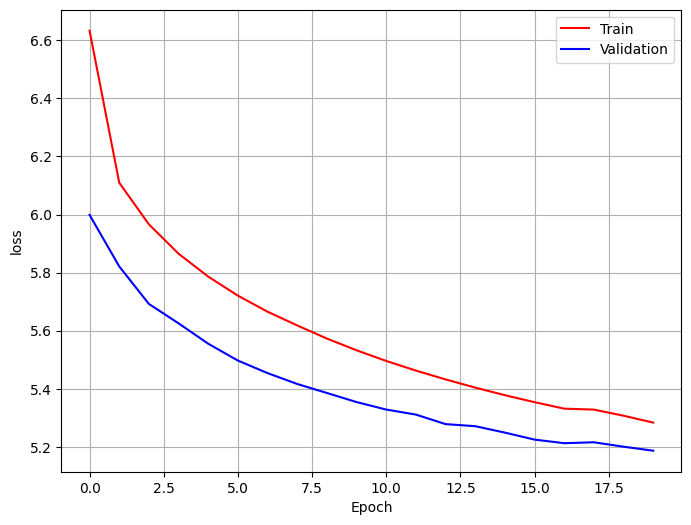

In [83]:
plt.figure(figsize=(8, 6))

plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

# 🔴 **Test**

🔰 Test your model using data from the test set

In [84]:
test_loss, test_metric = evaluate(model, test_loader, loss_fn, metric)
print(f"Test: Loss = {test_loss:.4}, Metric = {test_metric:.4}")

Test: Loss = 5.113, Metric = 0.2377


# 🔴 **Generate**

🔰 Your mission is to write a `generate` function and use a desired sentence to evaluate the model

In [85]:
model_path = 'model.pt'
model = torch.load(model_path)
model.eval()

LanguageModel(
  (embedding): Embedding(28785, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=28785, bias=True)
)

In [93]:
def generate(prompt, max_seq_len, temperature, model, tokenizer, vocab, seed=None):
    if seed is not None:
        torch.manual_seed(seed)

    # Tokenize and map prompt to vocab indices
    input_tokens = [vocab["<bos>"]] + [vocab[token] for token in tokenizer(prompt)]
    input_tensor = torch.tensor(input_tokens).unsqueeze(0).to(device)  # Shape: [1, seq_len]

    # Model in evaluation mode
    model.eval()

    generated_tokens = input_tokens.copy()

    with torch.no_grad():
        for _ in range(max_seq_len):
            # Get model predictions
            output = model(input_tensor)  # Shape: [1, seq_len, vocab_size]
            logits = output[:, -1, :]  # Use the last token's logits

            # Apply temperature and softmax
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)

            # Sample the next token
            next_token = torch.multinomial(probs, num_samples=1).item()

            # Stop generation if <eos> is generated
            if next_token == vocab["<eos>"]:
                break

            # Append to the generated sequence
            generated_tokens.append(next_token)

            # Update input tensor with the new token
            input_tensor = torch.tensor([generated_tokens[-len(input_tokens):]]).to(device)

    # Decode the generated tokens back to text
    generated_text = " ".join(vocab.lookup_tokens(generated_tokens))
    return generated_text


In [92]:
# Generate text
prompt = "We are going to"
max_seq_len = 50
temperature = 0.8

generated_text = generate(prompt, max_seq_len, temperature, model, tokenizer, vocab)
print("Generated Text:")
print(generated_text)


Generated Text:
we are going to be forced to the end of the season . as a result , another set the surviving strong sequence , and the band did not take place for fantasy @-@ man . an version of the first would make a highly @-@ year
